<a href="https://colab.research.google.com/github/AhamedShimak/pytorch/blob/main/Linear_regression_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT AND MY DEFINED FUNCTIONS

### Imports

In [118]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


###My functions

In [119]:
import torch
def details(tensor):
  print("")
  print("Shape: ",tensor.shape)
  print("Dimentions: ",tensor.ndim)
  print("###########")
  print(tensor)
  print("###########")
  print("Tensor Data type: ",tensor.dtype)
  print("Device: ",tensor.device)
  print("")

def details_plot(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

def details_loss_curve(epochs,train_loss_track,test_loss_track):
  #loss curve
  plt.figure(figsize=(8,8))
  plt.title("Loss curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(epochs,train_loss_track,label="Train loss")
  plt.plot(epochs,test_loss_track,label="Test loss")
  plt.legend(prop={"size": 14})

###GPU

In [120]:
!nvidia-smi
print(torch.cuda.is_available())
#setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(device)

Mon Apr 24 13:45:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    31W /  70W |    821MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##DATA PROCESS 


ex- tensor data-> x_train,y_train,x_test,y_test


In [90]:
# create data

#weight and bias
weight=-0.5
bias=0.4

x=torch.arange(0,10,0.1).to(device).unsqueeze(dim=1)
y=weight*x+bias+torch.randn(len(x)).unsqueeze(dim=1).to(device)*0.05  #######to prevent mat multiplication error

details(x),details(y)


Shape:  torch.Size([100, 1])
Dimentions:  2
###########
tensor([[0.0000],
        [0.1000],
        [0.2000],
        [0.3000],
        [0.4000],
        [0.5000],
        [0.6000],
        [0.7000],
        [0.8000],
        [0.9000],
        [1.0000],
        [1.1000],
        [1.2000],
        [1.3000],
        [1.4000],
        [1.5000],
        [1.6000],
        [1.7000],
        [1.8000],
        [1.9000],
        [2.0000],
        [2.1000],
        [2.2000],
        [2.3000],
        [2.4000],
        [2.5000],
        [2.6000],
        [2.7000],
        [2.8000],
        [2.9000],
        [3.0000],
        [3.1000],
        [3.2000],
        [3.3000],
        [3.4000],
        [3.5000],
        [3.6000],
        [3.7000],
        [3.8000],
        [3.9000],
        [4.0000],
        [4.1000],
        [4.2000],
        [4.3000],
        [4.4000],
        [4.5000],
        [4.6000],
        [4.7000],
        [4.8000],
        [4.9000],
        [5.0000],
        [5.1000],
       

(None, None)

In [91]:
# create train/test split
split_ratio =0.8

x_train,y_train,x_test,y_test= x[:int(len(x)*0.8)],y[:int(len(x)*0.8)],x[int(len(x)*0.8):],y[int(len(x)*0.8):]

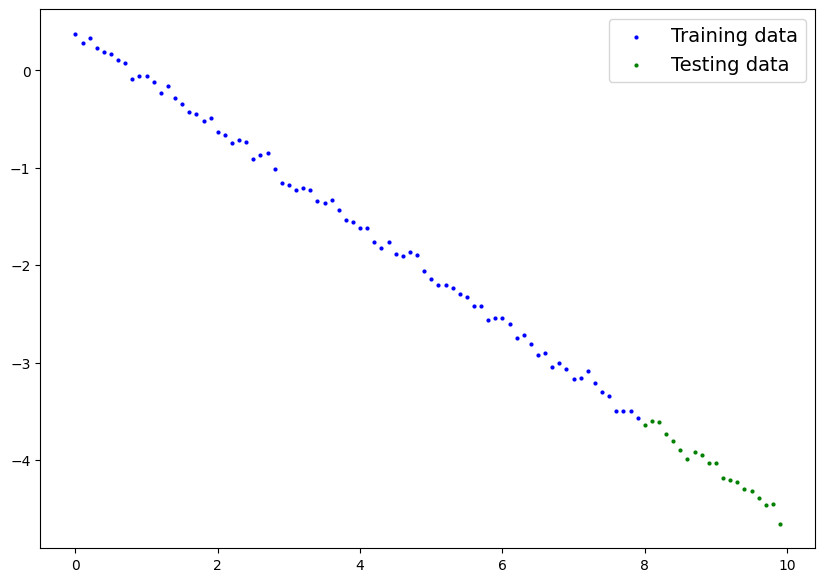

In [92]:
# plot and visualize it

details_plot(x_train.to("cpu"),y_train.to("cpu"),x_test.to("cpu"),y_test.to("cpu"))

##BUILDING THE MODEL


tips
1. torch.nn.find_suitable_loss
2. torch.nn.Paramenter
3. torch.nn.Module this is base class
4. torch.optim - optimizer

In [93]:
#model
class Linear_reg_model(nn.Module):
  def __init__(self):
    super().__init__()
    #model_structer
    self.linear_layer=nn.Linear(in_features=1,out_features=1)
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)



#discription of model
torch.manual_seed(88)
my_model=Linear_reg_model().to(device)

my_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5461]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3875], device='cuda:0'))])

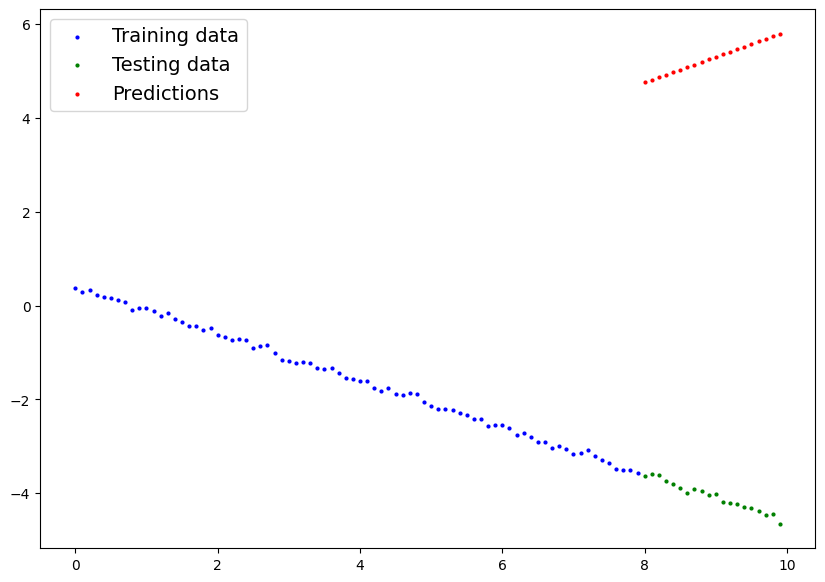

In [94]:
#make inference/prediction and visualize the model
with torch.inference_mode() :
  y_pred=my_model(x_test.to(device))

details_plot(x_train.to("cpu"),y_train.to("cpu"),x_test.to("cpu"),y_test.to("cpu"),y_pred.to("cpu"))


In [97]:
list(my_model.parameters())

[Parameter containing:
 tensor([[0.5461]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.3875], device='cuda:0', requires_grad=True)]

##CREATE OPTIMIZER / LOSS_FUNC

In [98]:
#create loss func
loss_func=nn.MSELoss()

#optimizer
optimizer=torch.optim.SGD(my_model.parameters(),lr=0.01)


##TRAINING / TESTING LOOP

tips
0. Loop throug the data
1. set to training mode
2. Forward pass
3. Calculate the loss(pred to ground truth)
4. optimizer zer grad
5. loss backward .. back propogation
6. optimizer step - use opt and adjust parameter ... grad desent


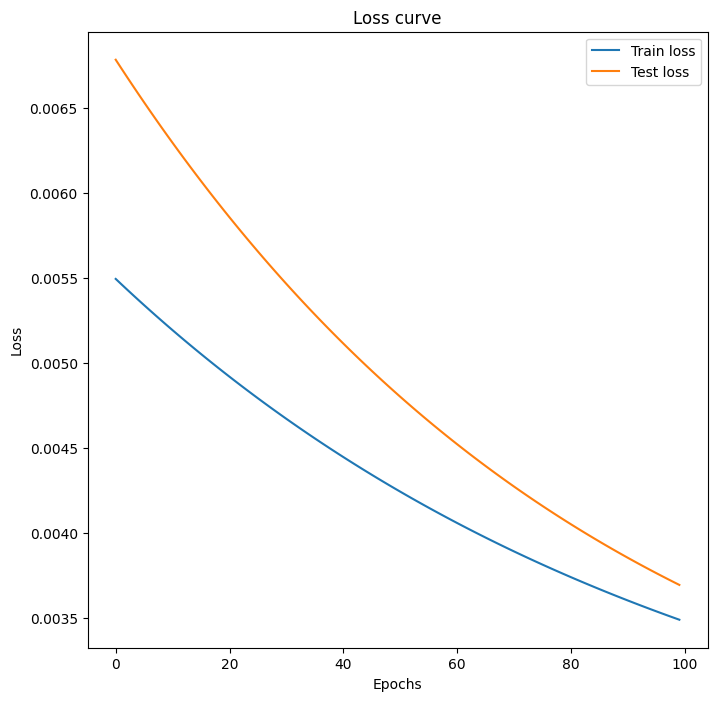

In [117]:
#initiate trackers and hyper parameters
epoch=100
epochs=range(epoch)
train_loss_track=[]
test_loss_track=[]


#training loop
for epoch in range(epoch):
  #set training mode
  my_model.train()
  
  #forward pass
  y_pred=my_model(x_train)
  #cal loss
  loss=loss_func(y_pred,y_train)
  
  #zer grad
  optimizer.zero_grad()

  #back prop
  loss.backward()

  #adjust para
  optimizer.step()
####testing part
  with torch.inference_mode():
    my_model.eval()
    y_test_pred=my_model(x_test)
    loss_test=loss_func(y_test_pred,y_test)

  train_loss_track.append(loss.to("cpu").detach())
  test_loss_track.append(loss_test.to("cpu").detach())


details_loss_curve(epochs,train_loss_track,test_loss_track)

##EVALUATION OF THE MODEL

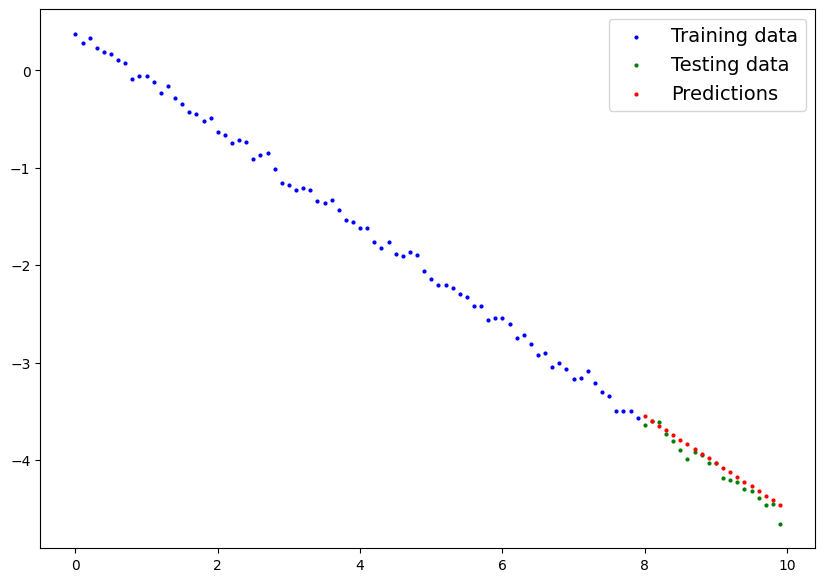

In [114]:
#plot / matrices
with torch.inference_mode() :
  y_pred=my_model(x_test.to(device))

details_plot(x_train.to("cpu"),y_train.to("cpu"),x_test.to("cpu"),y_test.to("cpu"),y_pred.to("cpu"))


##SAVING/LOADING

tips
1.  torch.save() 
2.  torch.load()
3.  toch.nn.Module.load_state_dict()

In [115]:
torch.save(my_model,"My_regression_model_in_pytorch.pt")